In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time

random.seed(100)

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

import cufflinks as cf
cf.go_offline()

3.10.0


In [3]:
### Data Preprocessing ###

dataset = pd.read_csv('1_EmployeeInformation.csv',parse_dates=['Date_Started','Date_Terminated'])

In [4]:
dataset1=dataset[dataset['Employee_Status']=='Terminated']

In [5]:
dataset['Date_Started_Year']=dataset['Date_Started'].dt.year
dataset['Date_Started_Month']=dataset['Date_Started'].dt.month
dataset['Date_Started_Day']=dataset['Date_Started'].dt.day

In [6]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset['Date_Started_Year'].iplot(kind='hist')


<Figure size 864x432 with 0 Axes>

In [7]:
dataset['Date_Started_Month'].iplot(kind='hist')

In [8]:
dataset1['Date_Terminated_Year']=dataset['Date_Terminated'].dt.year
dataset1['Date_Terminated_Month']=dataset['Date_Terminated'].dt.month

In [9]:
plt.figure(figsize=(12,6))
sns.set_style('white')


dataset1['Date_Terminated_Year'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [10]:
plt.figure(figsize=(12,6))
sns.set_style('white')
dataset1['Date_Terminated_Month'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [11]:
dataset1['Worked_Days']=dataset['Date_Terminated']-dataset['Date_Started']
dataset1['Worked_Days'].max()
dataset1['Worked_Days'].min()

Timedelta('0 days 00:00:00')

In [12]:
plt.figure(figsize=(12,8))
sns.set_style('white')



dataset1['Reason'].iplot(kind='hist')


<Figure size 864x576 with 0 Axes>

In [13]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['Age'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [14]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['Gender'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [15]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['Ethnicity'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [16]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['County'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [17]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['Default_Shift_Abbrev.'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [18]:
plt.figure(figsize=(12,6))
sns.set_style('white')

#sns.countplot(x='Hourly_Pay',data=dataset)


dataset1['Hourly_Pay'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [19]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['Supervisor_Name'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [20]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['EEO_Classification'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [21]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['Pay_Type'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [22]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['SOC_Code'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [23]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['Cost_Centers(Department)'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [24]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['Operations(Department)'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [25]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['Zip_Code'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [26]:
dataset.columns

Index(['Employee_EIN', 'Employee_Id', 'Age', 'Gender', 'Ethnicity', 'County',
       'Zip_Code', 'Default_Shift_Abbrev.', 'Date_Started', 'Date_Terminated',
       'Hourly_Pay', 'Reason', 'Supervisor_Name', 'Pay_Type',
       'Employee_Status', 'EEO_Classification', 'SOC_Code',
       'Cost_Centers(Department)', 'Operations(Department)',
       'Date_Started_Year', 'Date_Started_Month', 'Date_Started_Day'],
      dtype='object')

In [27]:
dataset.head(10)

,Employee_EIN,Employee_Id,Age,Gender,Ethnicity,County,Zip_Code,Default_Shift_Abbrev.,Date_Started,Date_Terminated,...,Supervisor_Name,Pay_Type,Employee_Status,EEO_Classification,SOC_Code,Cost_Centers(Department),Operations(Department),Date_Started_Year,Date_Started_Month,Date_Started_Day
0,IP Corp (Default),177,57.0,M,White (not Hispanic or Latino),Carroll,46929,1.0,1991-03-18,NaT,...,William A. Rhoades (IP Corp (Default)),Hourly,Active,Operatives,513023,30-Smoke-Pickle-Wash,30-Smoke-Pickle-Wash,1991,3,18
1,IP Corp (Default),211,59.0,M,White (not Hispanic or Latino),Carroll,46923,1.0,1991-04-01,NaT,...,Thor E. Spalsbury (IP Corp (Default)),Hourly,Active,Craft Workers,499041,Maintenance,NaN,1991,4,1
2,IP Corp (Default),230,56.0,F,White (not Hispanic or Latino),Carroll,46923,1.0,1991-04-05,NaT,...,William A. Rhoades (IP Corp (Default)),Hourly,Active,Operatives,513023,33-Bacon,33-Bacon,1991,4,5
3,IP Corp (Default),245,58.0,F,White (not Hispanic or Latino),Carroll,46913,1.0,2001-04-23,NaT,...,Kimberly D. Bradley (IP Corp (Default)),Hourly,Active,Operatives,372011,68-Showcase,68-Showcase,2001,4,23
4,IP Corp (Default),304,56.0,F,Asian (not Hispanic or Latino),White,47923,1.0,1991-05-13,NaT,...,William A. Rhoades (IP Corp (Default)),Hourly,Active,Operatives,513023,33-Bacon,33-Bacon,1991,5,13
5,IP Corp (Default),383,49.0,M,White (not Hispanic or Latino),Clinton,46058,1.0,1991-06-17,NaT,...,Doug N. Draper (IP Corp (Default)),Hourly,Active,Craft Workers,499041,Maintenance,NaN,1991,6,17
6,IP Corp (Default),387,62.0,F,White (not Hispanic or Latino),Carroll,46923,1.0,1997-12-01,NaT,...,Curtis Allen Plantenga (IP Corp (Default)),Hourly,Active,Laborers and Helpers,499098,64-Supply/Receiving,64-Supply,1997,12,1
7,IP Corp (Default),585,62.0,M,White (not Hispanic or Latino),Carroll,46929,1.0,1991-10-19,2019-07-01,...,Charles P. Martin (IP Corp (Default)),Hourly,Terminated,Operatives,519199,01-Livestock,01-Livestock,1991,10,19
8,IP Corp (Default),599,60.0,M,White (not Hispanic or Latino),White,47959,1.0,2019-01-21,2019-07-17,...,Dolores Angeles (IP Corp (Default)),Hourly,Terminated,Operatives,513023,07-Offal,07-Offal,2019,1,21
9,IP Corp (Default),602,63.0,F,NaN,Carroll,46923,1.0,1991-10-28,2019-01-03,...,Kimberly D. Bradley (IP Corp (Default)),Hourly,Terminated,NaN,372011,Showcase,NaN,1991,10,28


In [28]:
dataset['Hourly_Pay']=dataset['Hourly_Pay'].str.replace('$','')
dataset['Hourly_Pay']=dataset['Hourly_Pay'].str.replace('-','')
dataset['Hourly_Pay']=pd.to_numeric(dataset['Hourly_Pay'])

dataset.head()

,Employee_EIN,Employee_Id,Age,Gender,Ethnicity,County,Zip_Code,Default_Shift_Abbrev.,Date_Started,Date_Terminated,...,Supervisor_Name,Pay_Type,Employee_Status,EEO_Classification,SOC_Code,Cost_Centers(Department),Operations(Department),Date_Started_Year,Date_Started_Month,Date_Started_Day
0,IP Corp (Default),177,57.0,M,White (not Hispanic or Latino),Carroll,46929,1.0,1991-03-18,NaT,...,William A. Rhoades (IP Corp (Default)),Hourly,Active,Operatives,513023,30-Smoke-Pickle-Wash,30-Smoke-Pickle-Wash,1991,3,18
1,IP Corp (Default),211,59.0,M,White (not Hispanic or Latino),Carroll,46923,1.0,1991-04-01,NaT,...,Thor E. Spalsbury (IP Corp (Default)),Hourly,Active,Craft Workers,499041,Maintenance,NaN,1991,4,1
2,IP Corp (Default),230,56.0,F,White (not Hispanic or Latino),Carroll,46923,1.0,1991-04-05,NaT,...,William A. Rhoades (IP Corp (Default)),Hourly,Active,Operatives,513023,33-Bacon,33-Bacon,1991,4,5
3,IP Corp (Default),245,58.0,F,White (not Hispanic or Latino),Carroll,46913,1.0,2001-04-23,NaT,...,Kimberly D. Bradley (IP Corp (Default)),Hourly,Active,Operatives,372011,68-Showcase,68-Showcase,2001,4,23
4,IP Corp (Default),304,56.0,F,Asian (not Hispanic or Latino),White,47923,1.0,1991-05-13,NaT,...,William A. Rhoades (IP Corp (Default)),Hourly,Active,Operatives,513023,33-Bacon,33-Bacon,1991,5,13


In [29]:
#dataset['Zip_Code']=dataset['Zip_Code'].str.replace('47905-4523','47905')

#dataset['Zip_Code']=pd.to_numeric(dataset['Zip_Code'])

In [30]:
def label_fix2(label):
    if label=='Active':
        return 0    
    else: 
        return 1
dataset['Employee_Status'] = dataset['Employee_Status'].apply(label_fix2)

In [31]:
dataset.columns


Index(['Employee_EIN', 'Employee_Id', 'Age', 'Gender', 'Ethnicity', 'County',
       'Zip_Code', 'Default_Shift_Abbrev.', 'Date_Started', 'Date_Terminated',
       'Hourly_Pay', 'Reason', 'Supervisor_Name', 'Pay_Type',
       'Employee_Status', 'EEO_Classification', 'SOC_Code',
       'Cost_Centers(Department)', 'Operations(Department)',
       'Date_Started_Year', 'Date_Started_Month', 'Date_Started_Day'],
      dtype='object')

In [32]:
dataset.nunique()

Employee_EIN                   1
Employee_Id                 5322
Age                           61
Gender                         3
Ethnicity                      8
County                        87
Zip_Code                     279
Default_Shift_Abbrev.          3
Date_Started                 850
Date_Terminated              291
Hourly_Pay                    92
Reason                        32
Supervisor_Name              109
Pay_Type                       1
Employee_Status                2
EEO_Classification             7
SOC_Code                      34
Cost_Centers(Department)      37
Operations(Department)        22
Date_Started_Year             30
Date_Started_Month            12
Date_Started_Day              31
dtype: int64

In [33]:
dataset['Gender'].value_counts()

M    3529
F    1912
U      11
Name: Gender, dtype: int64

In [34]:
dataset['Gender']=dataset['Gender'].dropna()


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5453 entries, 0 to 5452
Data columns (total 22 columns):
Employee_EIN                5453 non-null object
Employee_Id                 5453 non-null int64
Age                         5452 non-null float64
Gender                      5452 non-null object
Ethnicity                   4765 non-null object
County                      5420 non-null object
Zip_Code                    5453 non-null object
Default_Shift_Abbrev.       5119 non-null float64
Date_Started                5453 non-null datetime64[ns]
Date_Terminated             3221 non-null datetime64[ns]
Hourly_Pay                  5095 non-null float64
Reason                      2791 non-null object
Supervisor_Name             5396 non-null object
Pay_Type                    5453 non-null object
Employee_Status             5453 non-null int64
EEO_Classification          5065 non-null object
SOC_Code                    5394 non-null object
Cost_Centers(Department)    5414 non-null o

In [36]:
dataset.describe()

,Employee_Id,Age,Default_Shift_Abbrev.,Hourly_Pay,Employee_Status,Date_Started_Year,Date_Started_Month,Date_Started_Day
count,5453.000000,5452.000000,5119.000000,5095.000000,5453.000000,5453.000000,5453.000000,5453.000000
mean,38636.761966,33.872524,1.598945,16.903482,0.590684,2017.045113,6.841372,15.715019
std,9772.109370,12.116647,0.548833,1.976126,0.491753,4.537585,3.607428,8.671759
min,177.000000,18.000000,1.000000,0.010000,0.000000,1991.000000,1.000000,1.000000
25%,35853.000000,24.000000,1.000000,16.220000,0.000000,2017.000000,4.000000,8.000000
50%,40347.000000,31.000000,2.000000,16.480000,1.000000,2019.000000,7.000000,16.000000
75%,46214.000000,42.000000,2.000000,17.000000,1.000000,2019.000000,10.000000,23.000000
max,110761.000000,81.000000,3.000000,37.080000,1.000000,2020.000000,12.000000,31.000000


C:\Users\caiyi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in greater

C:\Users\caiyi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in less

C:\Users\caiyi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\caiyi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



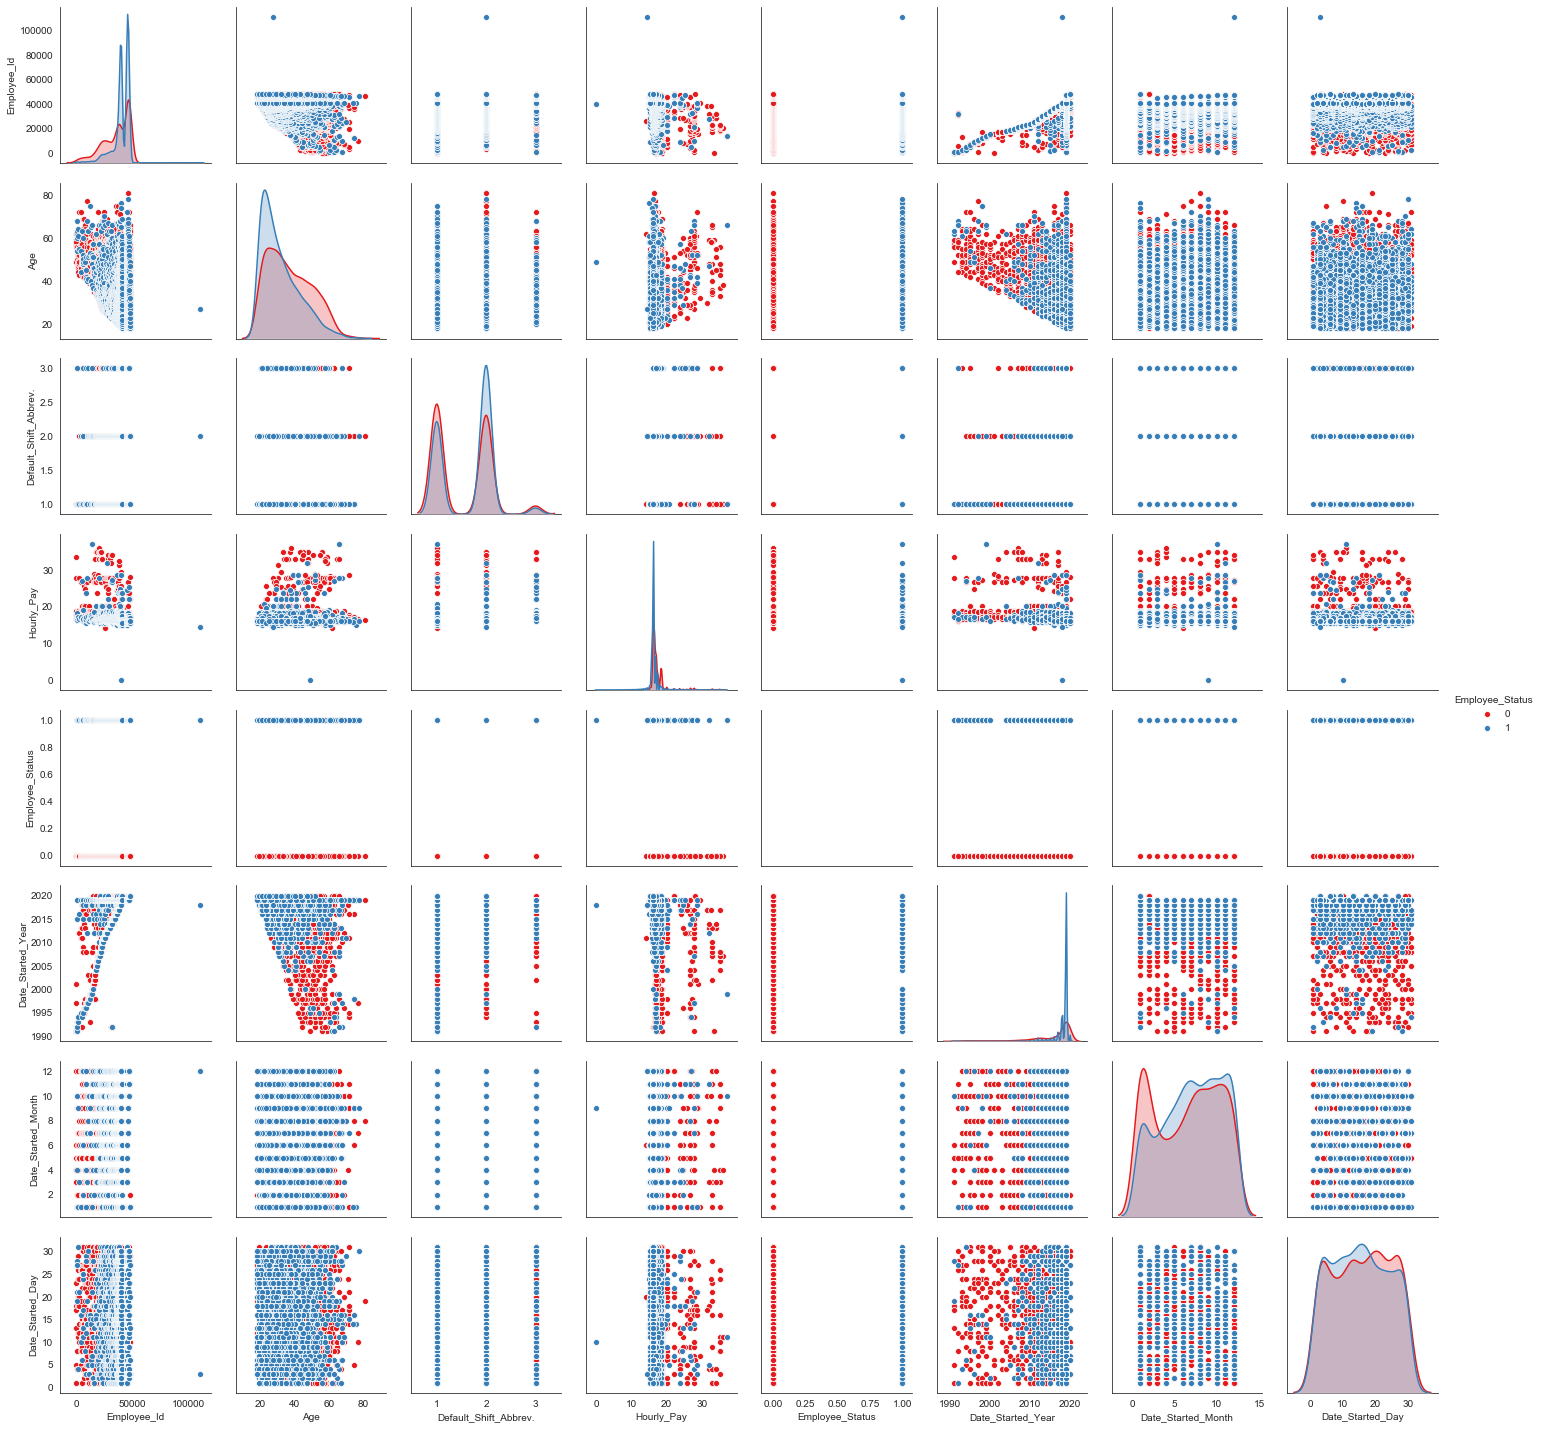

In [37]:
sns.pairplot(dataset,hue='Employee_Status',palette='Set1')

In [38]:
## Cleaning Data

# Removing NaN
dataset.isna().any() # No NAs

Employee_EIN                False
Employee_Id                 False
Age                          True
Gender                       True
Ethnicity                    True
County                       True
Zip_Code                    False
Default_Shift_Abbrev.        True
Date_Started                False
Date_Terminated              True
Hourly_Pay                   True
Reason                       True
Supervisor_Name              True
Pay_Type                    False
Employee_Status             False
EEO_Classification           True
SOC_Code                     True
Cost_Centers(Department)     True
Operations(Department)       True
Date_Started_Year           False
Date_Started_Month          False
Date_Started_Day            False
dtype: bool

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5453 entries, 0 to 5452
Data columns (total 22 columns):
Employee_EIN                5453 non-null object
Employee_Id                 5453 non-null int64
Age                         5452 non-null float64
Gender                      5452 non-null object
Ethnicity                   4765 non-null object
County                      5420 non-null object
Zip_Code                    5453 non-null object
Default_Shift_Abbrev.       5119 non-null float64
Date_Started                5453 non-null datetime64[ns]
Date_Terminated             3221 non-null datetime64[ns]
Hourly_Pay                  5095 non-null float64
Reason                      2791 non-null object
Supervisor_Name             5396 non-null object
Pay_Type                    5453 non-null object
Employee_Status             5453 non-null int64
EEO_Classification          5065 non-null object
SOC_Code                    5394 non-null object
Cost_Centers(Department)    5414 non-null o

C:\Users\caiyi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\caiyi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning:

invalid value encountered in less_equal



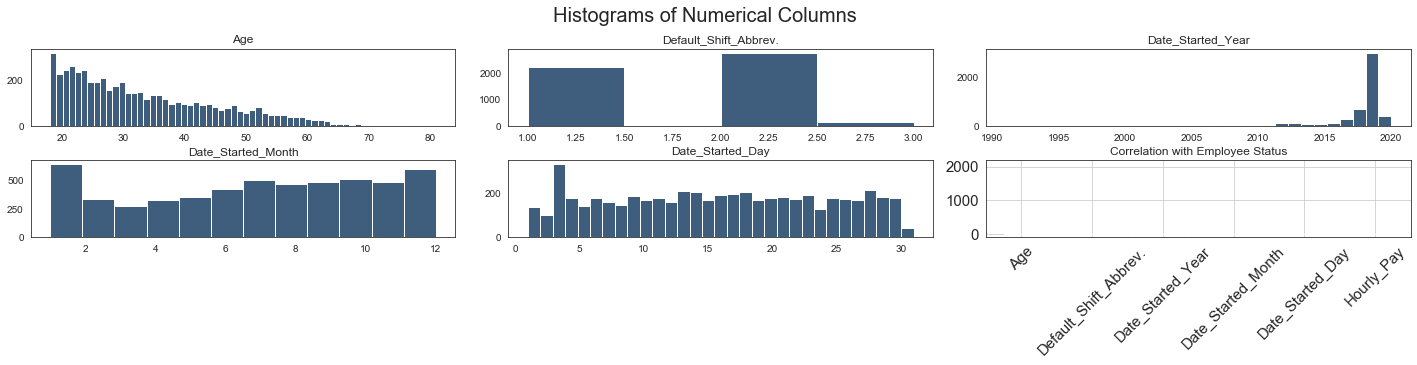

In [40]:
## Histograms

#dataset3 = dataset.drop(columns = ['Employee_EIN','Zip_Code',Employee_Id','Pay_Type','Date_Started','Date_Terminated','Reason','Employee_Status'])
dataset2=dataset[['Age','Default_Shift_Abbrev.','Date_Started_Year','Date_Started_Month','Date_Started_Day','Hourly_Pay']]

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


## Correlation with Response Variable (Note: Models like RF are not linear like these)

dataset2.corrwith(dataset.Employee_Status).plot.bar(
        figsize = (20, 10), title = "Correlation with Employee Status", fontsize = 15,
        rot = 45, grid = True)

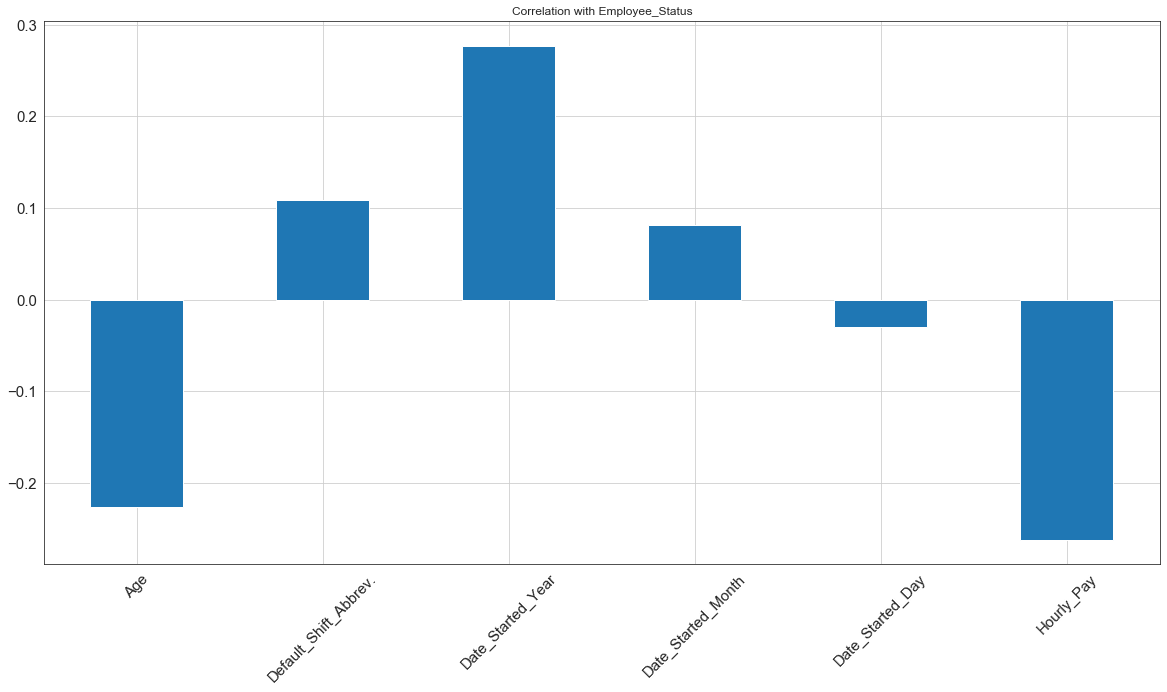

In [41]:
## Correlation with Response Variable (Note: Models like RF are not linear like these)

dataset2.corrwith(dataset.Employee_Status).plot.bar(
        figsize = (20, 10), title = "Correlation with Employee_Status", fontsize = 15,
        rot = 45, grid = True)

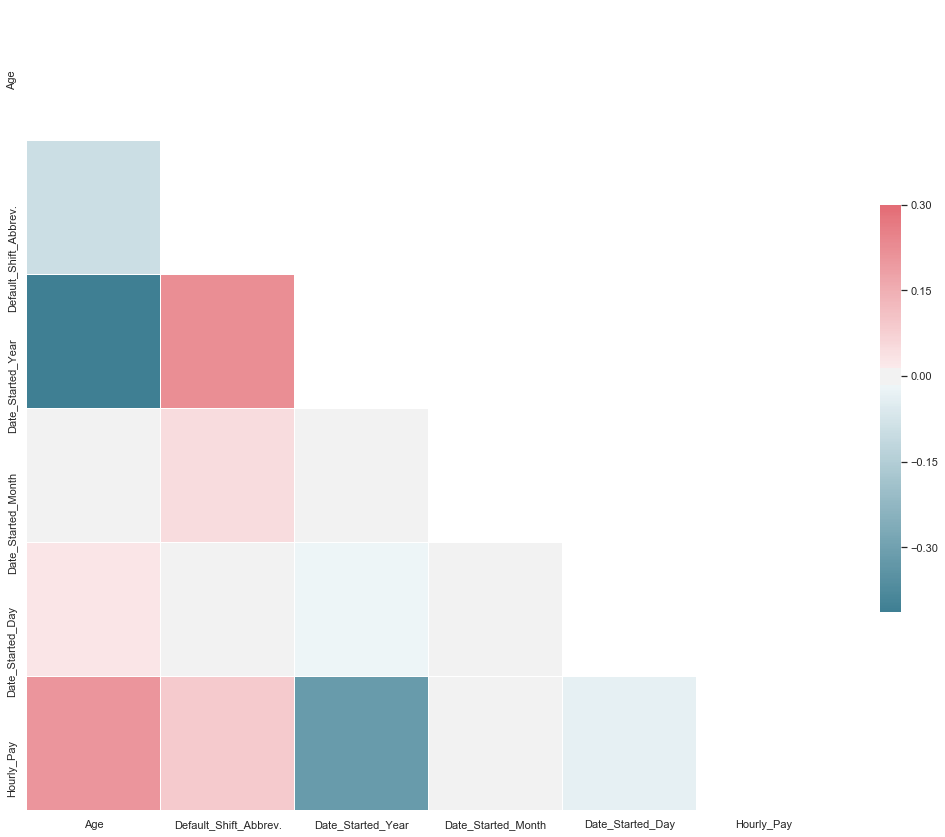

In [42]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


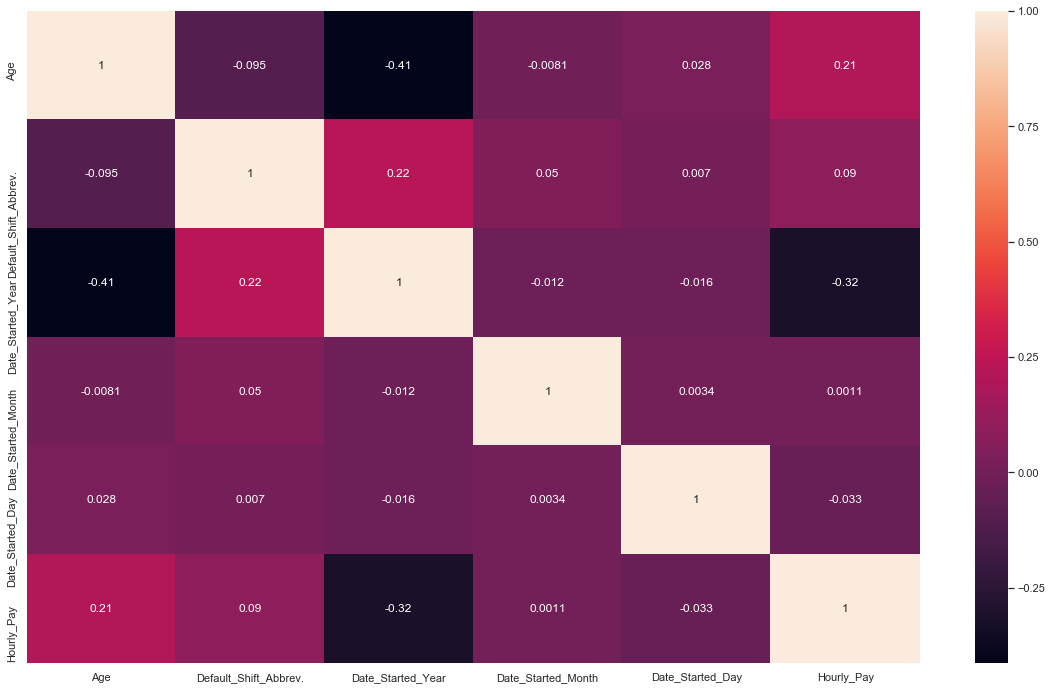

In [43]:
plt.figure(figsize=(20,12))

sns.heatmap(corr,annot=True,Cmap='coolwarm')

In [44]:
# Feature Engineering

#dataset = dataset.drop(columns = ['months_employed'])
#dataset['personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y * 12))


In [45]:
dataset3 = dataset.drop(columns = ['Employee_EIN','Zip_Code','Pay_Type','Date_Started','Date_Terminated','Reason'])
dataset3=dataset3.dropna()

In [46]:
dataset3.isna().any()

Employee_Id                 False
Age                         False
Gender                      False
Ethnicity                   False
County                      False
Default_Shift_Abbrev.       False
Hourly_Pay                  False
Supervisor_Name             False
Employee_Status             False
EEO_Classification          False
SOC_Code                    False
Cost_Centers(Department)    False
Operations(Department)      False
Date_Started_Year           False
Date_Started_Month          False
Date_Started_Day            False
dtype: bool

In [47]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4273 entries, 0 to 5452
Data columns (total 16 columns):
Employee_Id                 4273 non-null int64
Age                         4273 non-null float64
Gender                      4273 non-null object
Ethnicity                   4273 non-null object
County                      4273 non-null object
Default_Shift_Abbrev.       4273 non-null float64
Hourly_Pay                  4273 non-null float64
Supervisor_Name             4273 non-null object
Employee_Status             4273 non-null int64
EEO_Classification          4273 non-null object
SOC_Code                    4273 non-null object
Cost_Centers(Department)    4273 non-null object
Operations(Department)      4273 non-null object
Date_Started_Year           4273 non-null int64
Date_Started_Month          4273 non-null int64
Date_Started_Day            4273 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 567.5+ KB


In [48]:
#dataset = dataset.drop(columns = ['personal_account_m', 'personal_account_y'])

In [49]:
# One Hot Encoding
dataset = pd.get_dummies(dataset3)
dataset.columns


Index(['Employee_Id', 'Age', 'Default_Shift_Abbrev.', 'Hourly_Pay',
       'Employee_Status', 'Date_Started_Year', 'Date_Started_Month',
       'Date_Started_Day', 'Gender_F', 'Gender_M',
       ...
       'Operations(Department)_26-Conversion',
       'Operations(Department)_30-Smoke-Pickle-Wash',
       'Operations(Department)_33-Bacon', 'Operations(Department)_56-Shipping',
       'Operations(Department)_64-Receiving',
       'Operations(Department)_64-Supply',
       'Operations(Department)_68-Showcase',
       'Operations(Department)_72-Quality Control',
       'Operations(Department)_81-Training',
       'Operations(Department)_Maintenance -Level 1'],
      dtype='object', length=234)

In [50]:
#dataset = dataset.drop(columns = ['pay_schedule_semi-monthly'])

In [51]:
# Removing extra columns
response = dataset["Employee_Status"]
#users = dataset['studentID']
dataset = dataset.drop(columns = ["Employee_Status",'Employee_Id'])

In [52]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                    response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [53]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [54]:
#### Model Building ####

### Comparing Models

## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(X_train, y_train)

C:\Users\caiyi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [57]:
results = pd.DataFrame([['Linear Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [58]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.750877,0.730841,0.85,0.78593


In [59]:
## SVM (Linear)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

Test Data Accuracy: 0.7520


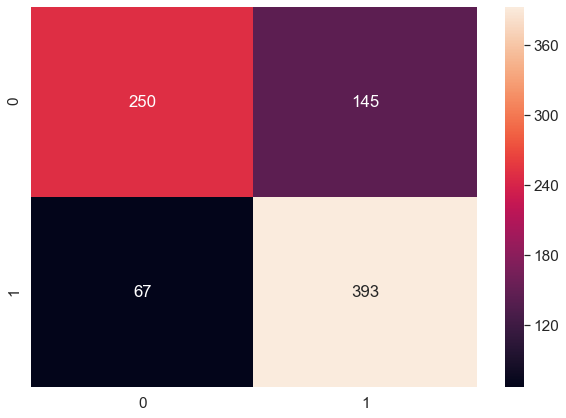

In [60]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [61]:
## SVM (rbf)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\caiyi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



Test Data Accuracy: 0.7439


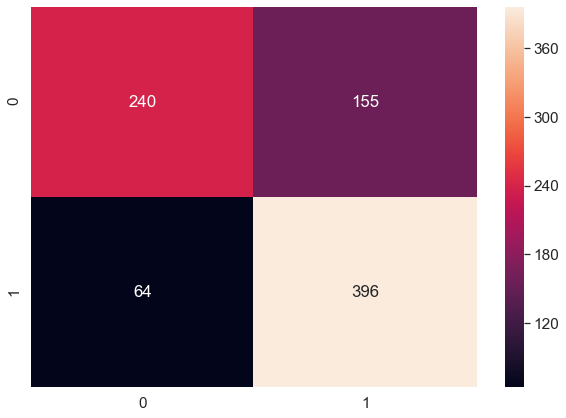

In [62]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [63]:
## RandomForest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)


In [64]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.750877,0.730841,0.850000,0.785930
1,SVM (Linear),0.752047,0.730483,0.854348,0.787575
2,SVM (RBF),0.743860,0.718693,0.860870,0.783383
3,Random Forest (n=100),0.798830,0.797521,0.839130,0.817797


In [65]:
## K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y = y_train,
                             cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.80 (+/- 0.04)


In [66]:
print(classifier.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [67]:
## Parameter Tuning
# pip install joblib
# conda install joblib

# Applying Grid Search

# Round 1: Entropy
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}


In [68]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

In [69]:
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 89.38 seconds


In [70]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.8016383850204798,
 {'bootstrap': False,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 10})

In [71]:
# Round 2: Entropy
parameters = {"max_depth": [None],
              "max_features": [8, 10, 12],
              'min_samples_split': [8, 10, 12],
              'min_samples_leaf': [1, 2, 3],
              "bootstrap": [False],
              "criterion": ["entropy"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 45.86 seconds


In [72]:
# Round 3: Entropy
parameters = {"max_depth": [None],
              "max_features": [8, 10, 12],
              'min_samples_split': [10, 12, 14],
              'min_samples_leaf': [1, 2, 3],
              "bootstrap": [False],
              "criterion": ["entropy"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 44.30 seconds


In [73]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.8042715038033939,
 {'bootstrap': False,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 12,
  'min_samples_leaf': 1,
  'min_samples_split': 12})

In [74]:
# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [75]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.750877,0.730841,0.850000,0.785930
1,SVM (Linear),0.752047,0.730483,0.854348,0.787575
2,SVM (RBF),0.743860,0.718693,0.860870,0.783383
3,Random Forest (n=100),0.798830,0.797521,0.839130,0.817797
4,"Random Forest (n=100, GSx2 + Entropy)",0.808187,0.800813,0.856522,0.827731


In [76]:

# Round 1: Gini
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 82.70 seconds


In [77]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters


(0.8001755412521943,
 {'bootstrap': False,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 10})

In [78]:
# Round 2: Gini
parameters = {"max_depth": [None],
              "max_features": [10, 12, 14],
              'min_samples_split': [8, 10, 12],
              'min_samples_leaf': [1, 2, 3],
              "bootstrap": [False],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 48.28 seconds


In [79]:
grid_search

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='

In [80]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.8077823288472791,
 {'bootstrap': False,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 12,
  'min_samples_leaf': 1,
  'min_samples_split': 10})

In [81]:
# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [82]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.750877,0.730841,0.850000,0.785930
1,SVM (Linear),0.752047,0.730483,0.854348,0.787575
2,SVM (RBF),0.743860,0.718693,0.860870,0.783383
3,Random Forest (n=100),0.798830,0.797521,0.839130,0.817797
4,"Random Forest (n=100, GSx2 + Entropy)",0.808187,0.800813,0.856522,0.827731
5,"Random Forest (n=100, GSx2 + Gini)",0.798830,0.792683,0.847826,0.819328


In [83]:
# Calssification using XGBoost:
# Decision Tree Base Learning

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (4, 8, 1),
    'n_estimators': range(100, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   51.9s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  5.9min
[Parallel(n_jobs=10)]: Done 360 out of 360 | elapsed: 12.8min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constra...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     seed=42, subsample=None, tree_method=None,
                                     validate_parameters=False,
                            

In [84]:
Xgboost_best_accuracy = grid_search.best_score_
Xgboost_best_parameters = grid_search.best_params_
Xgboost_best_accuracy, Xgboost_best_parameters

(0.9031585390187953,
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 180})

In [85]:
# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Xgboost', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [86]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.750877,0.730841,0.850000,0.785930
1,SVM (Linear),0.752047,0.730483,0.854348,0.787575
2,SVM (RBF),0.743860,0.718693,0.860870,0.783383
3,Random Forest (n=100),0.798830,0.797521,0.839130,0.817797
4,"Random Forest (n=100, GSx2 + Entropy)",0.808187,0.800813,0.856522,0.827731
5,"Random Forest (n=100, GSx2 + Gini)",0.798830,0.792683,0.847826,0.819328
6,Xgboost,0.812865,0.821888,0.832609,0.827214


Test Data Accuracy: 0.8129


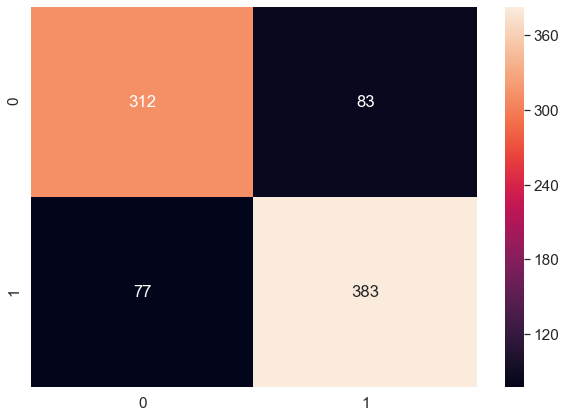

In [87]:
## EXTRA: Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))


In [88]:

#### End of Model ####
users = dataset3['Employee_Id']

# Formatting Final Results

final_results = pd.concat([y_test, users], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results = final_results[['Employee_Id', 'Employee_Status', 'predictions']]

In [89]:
final_results

,Employee_Id,Employee_Status,predictions
2,230,0.0,0
21,1971,0.0,0
27,2143,0.0,1
28,2217,1.0,0
36,2885,0.0,1
37,2909,0.0,1
40,4532,0.0,1
41,4563,0.0,0
46,4801,0.0,0
50,5035,0.0,0


In [90]:
from sklearn.metrics import roc_auc_score

In [91]:
roc_auc_score(y_test, y_pred)

0.8112410566868464

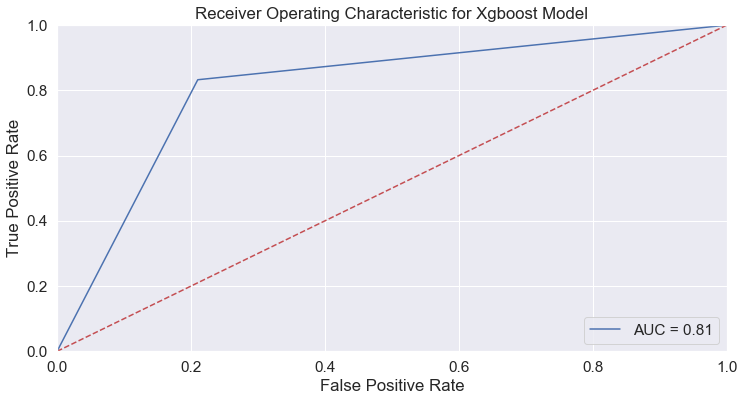

In [96]:
plt.figure(figsize=(12,6))

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Xgboost Model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
